#previsao

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import itertools
from pandas.core.common import random_state


df = pd.read_csv('./cod.csv')

df


,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.400000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,ImranePROPG#2085215,0,51,0.432203,0,10,0,110,0,71,11,71.0,0,0,0,49935,0.0,0,118
1554,Miguel_mor#1492856,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1555,Trianthor#3462590,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1556,tinytrex594#3976133,0,0,0.000000,0,1,0,0,2,1,0,1.0,0,1,7,0,91.2,9,0


In [ ]:
df.isnull().sum()

name              0
wins              0
kills             0
kdRatio           0
killstreak        0
level             0
losses            0
prestige          0
hits              0
timePlayed        0
headshots         0
averageTime       0
gamesPlayed       0
assists           0
misses            0
xp                0
scorePerMinute    0
shots             0
deaths            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1558 non-null   object 
 1   wins            1558 non-null   int64  
 2   kills           1558 non-null   int64  
 3   kdRatio         1558 non-null   float64
 4   killstreak      1558 non-null   int64  
 5   level           1558 non-null   int64  
 6   losses          1558 non-null   int64  
 7   prestige        1558 non-null   int64  
 8   hits            1558 non-null   int64  
 9   timePlayed      1558 non-null   int64  
 10  headshots       1558 non-null   int64  
 11  averageTime     1558 non-null   float64
 12  gamesPlayed     1558 non-null   int64  
 13  assists         1558 non-null   int64  
 14  misses          1558 non-null   int64  
 15  xp              1558 non-null   int64  
 16  scorePerMinute  1558 non-null   float64
 17  shots           1558 non-null   i

In [ ]:
df = df[df['timePlayed'] > 0]



df


,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
1,JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,7,0,7.000000,0,0,0,700,0.000000,0,16
2,bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,32,16,32.000000,0,1,0,48300,0.000000,0,64
3,JNaCo#5244172,3,2,0.400000,0,1,0,0,0,3,0,3.000000,0,0,0,1150,0.000000,0,5
4,gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,5,1,5.000000,0,0,0,1000,0.000000,0,10
5,Brxndoon7-LK#4002715,684,27011,1.066743,18,177,10,110,98332,1366,5113,2.323129,588,6063,305319,3932335,255.672035,403651,25321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,JermWormy#5125402,1173,45764,1.078627,20,289,14,111,128437,3272,7146,2.655844,1232,7133,409748,8740718,214.819438,538185,42428
1552,LokiiFN#2367402,0,0,0.000000,0,1,0,0,0,1,0,1.000000,0,0,0,200,0.000000,0,2
1553,ImranePROPG#2085215,0,51,0.432203,0,10,0,110,0,71,11,71.000000,0,0,0,49935,0.000000,0,118
1556,tinytrex594#3976133,0,0,0.000000,0,1,0,0,2,1,0,1.000000,0,1,7,0,91.200000,9,0


<ipython-input-36-7319d2b312ab>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df.corr()


<Axes: >

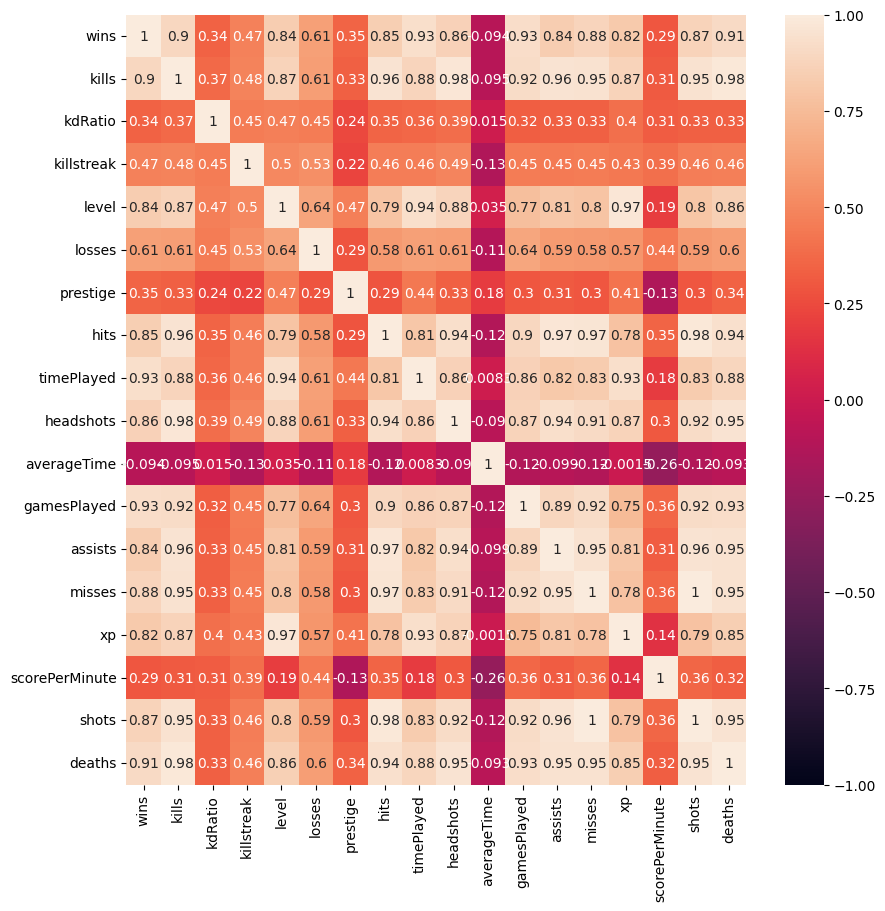

In [ ]:
correlacao = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlacao,annot=True, vmin=-1,vmax=1)

In [ ]:
corrAlvo = abs(correlacao["kdRatio"])
#utilizando os valores com correlacao maior que 0.2
valoresRelevantes = corrAlvo[corrAlvo > 0.2]

caracteristicas = [index for index, value in valoresRelevantes.iteritems()]

caracteristicas.remove("kdRatio")

caracteristicas

<ipython-input-18-aa704cf0257b>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  caracteristicas = [index for index, value in valoresRelevantes.iteritems()]


['wins',
 'kills',
 'killstreak',
 'level',
 'losses',
 'prestige',
 'hits',
 'timePlayed',
 'headshots',
 'gamesPlayed',
 'assists',
 'misses',
 'xp',
 'scorePerMinute',
 'shots',
 'deaths']

In [ ]:
x = df[caracteristicas]
y = df['kdRatio']

y

1       0.000000
2       1.031250
3       0.400000
4       0.200000
5       1.066743
          ...   
1551    1.078627
1552    0.000000
1553    0.432203
1556    0.000000
1557    0.686275
Name: kdRatio, Length: 1348, dtype: float64

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y,test_size=0.2)

print(x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape)

(1078, 16) (270, 16) (1078,) (270,)


In [ ]:
regressao = LinearRegression()
regressao.fit(x2_train, y2_train)

prevision = regressao.predict(x2_test)


prevision

array([0.51959579, 0.77891667, 1.0330973 , 0.6036564 , 1.26681642,
       0.67794628, 0.67650668, 0.60515866, 0.71065563, 0.64492792,
       0.6472786 , 0.45902659, 0.46879197, 0.68323087, 0.59901032,
       0.71480063, 1.37145363, 0.4726154 , 0.66588521, 1.00595765,
       0.4594087 , 0.6631646 , 1.06895481, 1.03061793, 0.5022869 ,
       0.51308663, 0.87436674, 0.71799181, 0.50283841, 0.65185384,
       0.48007962, 1.86937608, 1.05136672, 0.84863523, 0.53062489,
       0.66677928, 1.84997337, 0.81930548, 0.57242922, 0.82545781,
       0.60540114, 1.01352249, 1.38733702, 0.83163396, 1.43995202,
       1.15913289, 1.14579258, 0.63462295, 0.6636264 , 0.60566524,
       0.63533619, 0.95195882, 0.77385066, 0.467754  , 0.63139777,
       1.15658982, 1.16732855, 0.73459419, 0.98581671, 0.81418485,
       0.59746023, 0.56234847, 0.45777643, 0.54199725, 0.8345093 ,
       0.80504773, 0.69314797, 0.88176901, 0.70211884, 1.05865878,
       1.06257075, 0.86009489, 0.45977743, 0.78161834, 0.95675

In [ ]:
compare = pd.DataFrame({"Atual": y2_test, "Previsto": prevision})
compare

,Atual,Previsto
460,0.404494,0.519596
538,0.755876,0.778917
1396,0.947923,1.033097
1434,1.101617,0.603656
8,1.036658,1.266816
...,...,...
380,0.950761,1.010074
1537,1.147359,0.847335
572,0.807918,0.860455
1416,1.040000,0.655481


In [ ]:

print("media do erro absoluto")
print(mean_absolute_error(y2_test, prevision))

media do erro absoluto
0.20750800449321824


#Arvore de decisao

In [ ]:
x1 = df[caracteristicas]
y1 = df['kdRatio']

y1

1       0.000000
2       1.031250
3       0.400000
4       0.200000
5       1.066743
          ...   
1551    1.078627
1552    0.000000
1553    0.432203
1556    0.000000
1557    0.686275
Name: kdRatio, Length: 1348, dtype: float64

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1,test_size=0.2)

print(x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape)

(1078, 16) (270, 16) (1078,) (270,)


In [ ]:

CRITERION = ['squared_error', 'absolute_error']
MAXDEPTH = [5,10]

for criterio, maxdepth in itertools.product(CRITERION, MAXDEPTH):

  print('rodando a decisionTreeRegressor com {} criterion e {} maxdepth'.format(criterio, maxdepth))
  print("\n")

  regressor = DecisionTreeRegressor(criterion=criterio, max_depth=maxdepth, min_samples_split=10,random_state=1)

  regressor.fit(x1_train,y1_train)

  yprediction = regressor.predict(x1_test)


  yprediction

  print("media do erro absoluto")
  print(mean_absolute_error(y1_test, yprediction))
  print('\n')

rodando a decisionTreeRegressor com squared_error criterion e 5 maxdepth


media do erro absoluto
0.14747347487329676


rodando a decisionTreeRegressor com squared_error criterion e 10 maxdepth


media do erro absoluto
0.11967660595830489


rodando a decisionTreeRegressor com absolute_error criterion e 5 maxdepth


media do erro absoluto
0.14642314816298233


rodando a decisionTreeRegressor com absolute_error criterion e 10 maxdepth


media do erro absoluto
0.12182443414171332




In [ ]:
#valores = pd.DataFrame({"Atual": y1_test, "Previsto": yprediction})
#valores

In [ ]:
#print("media do erro absoluto")
#print(mean_absolute_error(y1_test, yprediction))